#Import libraries


In [1]:
import pandas as pd
import numpy as np

import re

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load data




In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TFM_FINAL/scrapped_data.csv", index_col=0)
df = df[['text', 'label']]
#Remove duplicates
df = df.drop_duplicates()
df = df.dropna()
#Remove general
df = df[df['label'] != 'General']
df = df.reset_index(drop=True)

Let's analyze the distribution of the categories on both datasets

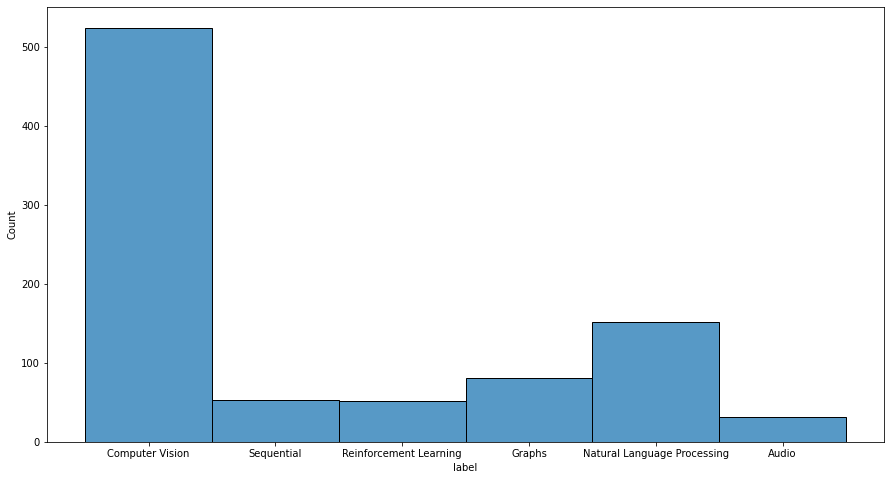

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x='label',data=df)

# Preprocess

Before applying any topic modelling algorithms we will clean our data form noise and special characters that won't provide us of any information. In this process we focus on the following:

*   Remove links
*   Remove equations
*   Remove abbreviations
*   Remove special characrer, such as *, /, !,etc.
*   Remove words with only one character
*   Substitute long for single spaces
*   Remove new line characters
*   Tranforming text to lower case

In [ ]:
def cleaner(text):
    """
    Preprocess the abstracts
    """
    #Remove links
    text = re.sub(r'https:\S+',' ',str(text))
    #Remove equations
    text = re.sub(r'(\$[^$]+\$)|(\$\$[^$]+\$\$)',' ',text)
    #Remove common abbreviations
    text = re.sub(r'i\.e\.|e\.g\.|etc.',' ',text)
    #Remove special characters
    text = re.sub(r'\W',' ',text)
    #Remove words with only one character
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    #Remove nones
    text = re.sub(r'[Nn]one',' ', text)
    #Substitute long space for one space
    text = re.sub(r'\s+',' ', text, flags=re.I)
    #Remove new line characters
    text = text.rstrip()
    #Change text to lower case
    text = text.lower()
    return text

In [ ]:
df['text'] = df['text'].apply(cleaner)
#Tokenize
tokenizer = ToktokTokenizer() 
df['Tokens'] = df['text'].apply(tokenizer.tokenize)

0    sniper efficient multi scale training we prese...
1    temporal difference variational auto encoder t...
2    mckernel library for approximate kernel expans...
3    addressing function approximation error in act...
4    neural discrete representation learning learni...
Name: text, dtype: object


Once the frist preprocess has been done, we move on to removing stopwords and stemming.

In [ ]:
#Second filter stopwords
STOPWORDS = set(stopwords.words("english"))

def filter_stopword_digits(tokens):
    """
    Filter stopwords and digits from a lsit of tokens
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

df['Tokens'] = df['Tokens'].apply(filter_stopword_digits)

In [ ]:
stemmer = SnowballStemmer("english")

def stem_words(tokens):
    """
    Reduce each token to its root
    """
    return [stemmer.stem(token) for token in tokens]

df['Tokens'] = df['Tokens'].apply(stem_words)

# Save preprocessed dataset

In [ ]:
with open("/content/drive/MyDrive/TFM_FINAL/prep_abstracts.csv", 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)